# TODO: 
    Comment code
    Add descriptions and explainations
    
# DONE: 
    ELS code generator
    Interactive widget to compare texts
    Overall coding framework

In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
import ipywidgets as widgets

In [2]:
f = open('data/aladdin.txt')
aladdin = f.read()
f.close()
print(aladdin[:500])

ALADDIN:  THE COMPLETE SCRIPT
COMPILED BY BEN SCRIPPS <34RQNPQ@CMUVM.CSV.CMICH.EDU>
(Portions Copyright (c) 1992 The Walt Disney Company)

PEDDLER:    Oh I come from a land
    From a faraway place
    Where the caravan camels roam
    Where they cut off your ear /Where it's flat and immense
    If they don't like your face /And the heat is intense
    It's barbaric, but hey--it's home!
    When the wind's at your back
    And the sun's from the west
    And the sand in the glass is right
    Co


In [3]:
def clean_text(string, numbers=False):
    removed = " ()''.’“”!@#$%^&*+=:,/?;|}{][<>`~}1234567890"
    other = ["\n", "\t", "\w", '"']
    new = string
    for r in removed:
        new = new.replace(r, '')
    for o in other:
        new = new.replace(o, '')
    return new.lower()

aladdin = clean_text(aladdin)
print(aladdin[:500])

aladdinthecompletescriptcompiledbybenscrippsrqnpqcmuvmcsvcmicheduportionscopyrightcthewaltdisneycompanypeddlerohicomefromalandfromafarawayplacewherethecaravancamelsroamwheretheycutoffyourearwhereitsflatandimmenseiftheydontlikeyourfaceandtheheatisintenseitsbarbaricbuthey--itshomewhenthewindsatyourbackandthesunsfromthewestandthesandintheglassisrightcomeondownstoponbyhopacarpetandflytoanotherarabiannightarabiannightslikearabiandaysmoreoftenthannotarehotterthanhotinalotofgoodwaysarabiannightsneathar


In [4]:
with open("data/english_words.txt") as word_file:
    english_words = set(word.strip().lower() for word in word_file)
print(list(english_words)[:50])

['haccucal', 'alivincular', 'caseworks', 'platyrrhina', 'well-made', 'moutlers', 'anasazi', 'overdiscouraging', 'bumpkinet', 'inbringer', 'ttfn', 'acetol', 'trans-severn', 'unulcerousness', 'rosebushes', 'chifley', 'pelvics', 'balneographer', 'unmashed', 'splendiferously', 'esquamate', 'valet-de-place', 'cussedly', 'paleontologists', 'world-disappointing', 'thundersmiting', 'towermen', 'phonographs', 'correctiveness', 'savouriness', 'flamming', "hitter's", 'siliceous', 'myalgias', 'standardly', 'vintaged', 'antiecclesiastical', 'subpyriform', 'asabi', 'jestings', 'dog-headed', 'bonebinder', 'christofer', 'canvasing', 'geom', 'road-oiling', 'shapeshifter', 'congenitally', 'tin-pot', 'new-array']


In [5]:
def is_english_word(word):
    return word.lower() in english_words

print("Is 'hello' an english word? {}".format(is_english_word('hello')))
print("Is 'lol' an english word? {}".format(is_english_word('lol')))

Is 'hello' an english word? True
Is 'lol' an english word? False


In [6]:
def els_code_generator(stride_start, stride_end, min_word_len, max_word_len, string, lookout_for=[]):
    t0 = time.time()
    t1 = t0
    dictionary = {}
    print_mark = round(stride_end/10)
    l = len(string)
    for k in range(stride_start, stride_end, 1):
        for i in range(0, l):
            cur = i
            new_text = string[cur]
            while cur < l and len(new_text) <= max_word_len:
                if len(new_text) >= min_word_len and is_english_word(new_text):
                    if new_text in lookout_for:
                        print(f"{new_text}: {k}")
                    if new_text not in dictionary.keys():
                        dictionary[new_text] = 1
                    else:
                        dictionary[new_text] += 1
                cur += k
                if cur < l:
                    new_text += string[cur]
        if k%print_mark==0:
            print(f"finished step {k} in {round(time.time()-t1, 2)}s")
            t1 = time.time()
    print('normalizing results')
    for word in dictionary.keys():
        dictionary[word] = dictionary[word]/l
    print(f"total time: {round(time.time()-t0, 2)}s")
    return dictionary

aladdin_dictionary = els_code_generator(2, 100, 0, 10, aladdin)

finished step 10 in 4.75s
finished step 20 in 5.43s
finished step 30 in 5.38s
finished step 40 in 5.33s
finished step 50 in 5.28s
finished step 60 in 5.39s
finished step 70 in 5.49s
finished step 80 in 5.48s
finished step 90 in 5.25s
normalizing results
total time: 52.5s


In [14]:
def check(dictionary, word, state_naw=True):
    if not is_english_word(word) and state_naw:
        return "not a word"
    if word in dictionary.keys():
        return dictionary[word]
    return 0

print("Normalized number of times 'a' was found in the Aladdin text: {}".format(check(aladdin_dictionary, 'a')))
print("Normalized number of times 'bear' was found in the Aladdin text: {}".format(check(aladdin_dictionary, 'bear')))
print("Normalized number of times 'sensibility' was found in the Aladdin text: {}".format(check(aladdin_dictionary, 'sensibility')))
print("Normalized number of times 'science_sensibility' was found in the Aladdin text: {}".format(check(aladdin_dictionary, 'science_sensibility')))

Normalized number of times 'a' was found in the Aladdin text: 9.621847808014188
Normalized number of times 'bear' was found in the Aladdin text: 0.0010668957490439506
Normalized number of times 'sensibility' was found in the Aladdin text: 0
Normalized number of times 'science_sensibility' was found in the Aladdin text: not a word


In [15]:
with open("data/metamorphosis.txt") as text:
    metamorphosis_dictionary = els_code_generator(2, 100, 0, 10, clean_text(text.read()))

finished step 10 in 6.37s
finished step 20 in 7.29s
finished step 30 in 7.04s
finished step 40 in 6.73s
finished step 50 in 6.89s
finished step 60 in 6.7s
finished step 70 in 6.72s
finished step 80 in 6.7s
finished step 90 in 6.83s
normalizing results
total time: 67.53s


In [9]:
with open("data/alice_in_wonderland.txt") as text:
    alice_wonderland_dictionary = els_code_generator(2, 100, 0, 10, clean_text(text.read()))

finished step 10 in 7.47s
finished step 20 in 8.31s
finished step 30 in 8.32s
finished step 40 in 8.3s
finished step 50 in 8.54s
finished step 60 in 8.69s
finished step 70 in 8.65s
finished step 80 in 8.02s
finished step 90 in 7.85s
normalizing results
total time: 81.66s


In [10]:
with open("data/study_in_scarlet.txt") as text:
    study_scarlet_dictionary = els_code_generator(2, 100, 0, 10, clean_text(text.read()))

finished step 10 in 4.83s
finished step 20 in 5.36s
finished step 30 in 5.28s
finished step 40 in 5.3s
finished step 50 in 5.22s
finished step 60 in 5.29s
finished step 70 in 5.29s
finished step 80 in 5.74s
finished step 90 in 5.53s
normalizing results
total time: 52.54s


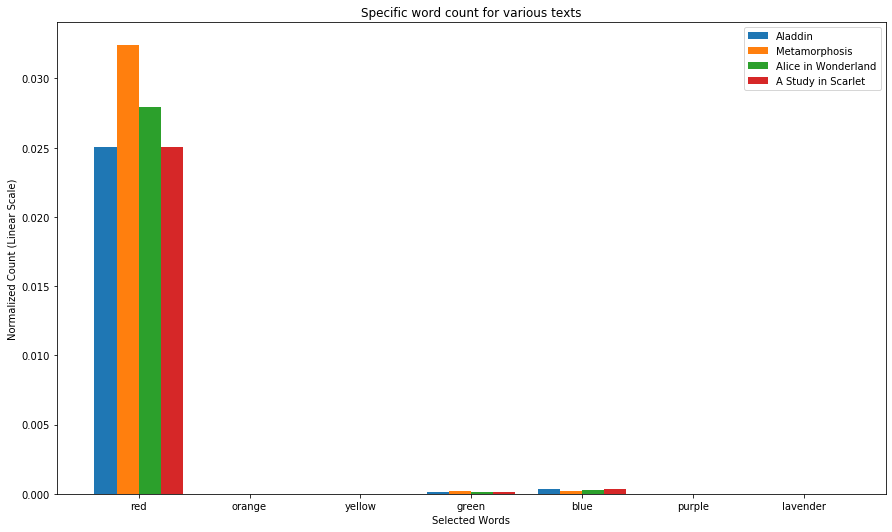

In [65]:
dictionary_options = {'Aladdin' : aladdin_dictionary, 
                     'Metamorphosis' : metamorphosis_dictionary,
                     'Alice in Wonderland' : alice_wonderland_dictionary,
                     'A Study in Scarlet' : study_scarlet_dictionary}

def compare_word(labels, dictionaries, probability=False):
    labels_list = labels.strip().split(' ')
    fig, ax = plt.subplots(figsize=(12.5, 7.5))
    width = 0.2
    shift = 0
    index = np.arange(len(labels_list))
    for dictionary in dictionaries:
        if probability:
            counts = [check(dictionary_options[dictionary], label, False)*26**len(label) for label in labels_list]
        else:
            counts = [check(dictionary_options[dictionary], label, False) for label in labels_list]
        ax.bar(index + shift, counts, width, label=dictionary)
        shift += width
    labels_list = [i if is_english_word(i) else i+" (NAW)" for i in labels_list]
    plt.xticks(index + width*(len(dictionaries)-1)/2, labels_list)
    plt.xlabel('Selected Words')
    if probability:
        plt.ylabel('Normalized Count * Approximate probability of occurance (Log Scale)')
        plt.yscale('log')
    else:
        plt.ylabel('Normalized Count (Linear Scale)')
    plt.title('Specific word count for various texts')
    plt.legend()
    plt.tight_layout()

compare_word('red orange yellow green blue purple lavender', list(dictionary_options.keys()))

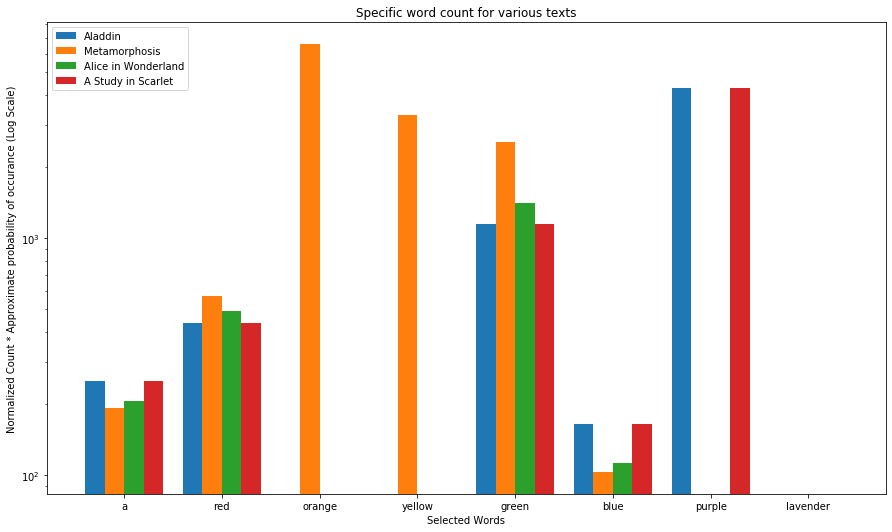

In [66]:
compare_word('a red orange yellow green blue purple lavender', list(dictionary_options.keys()), True)

In [68]:
widgets.interact(compare_word, 
                    labels=widgets.Textarea(value='earth wind fire'), 
                    dictionaries=widgets.widgets.SelectMultiple(options=dictionary_options.keys(), 
                                                                value=list(dictionary_options.keys())),
                    probibility=widgets.Checkbox(value=False, description='Multiple probability of occurance'))

interactive(children=(Textarea(value='earth wind fire', description='labels'), SelectMultiple(description='dic…

<function __main__.compare_word(labels, dictionaries, probability=False)>